# <a id='toc1_'></a>[CALIBRAGE DES VALUERS AVEC VALEURS DE TARTARUS](#toc0_)

1. **MVOTO KONGO Patrick Sorrel**, sorrel.mvoto@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I 
Etudiant de Master au Laboratoire de 
    * Physique Atomique Moleculaire et Biophysique


31 JUILLET 2024

### <a id='toc1_'></a>[Utilisation de Pandas  pour extraire les information dans le fichiers my_DFT_HF_XTB_DFTD4.csv et creer un DataFrame](#toc0_)

In [1]:
import pandas as pd
from scipy.stats import pearsonr
import hvplot.pandas  
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import linregress

In [2]:

df= pd.read_csv('my_DFT_HF_XTB_DFTD4.csv')
df

smiles smiles_key  HOMO(eV)  HOMO_xtb(eV)  HOMO_HF(eV)  \
0              C=O      gdb 6 -7.265440      -11.5340   -11.850312   
1             CC=O     gdb 11 -6.911692      -11.1333   -11.408327   
2          CC(C)=O     gdb 18 -6.615088      -10.8478   -11.069303   
3           C#CC#C     gdb 23 -7.072239      -10.9034    -9.802031   
4           C#CC#N     gdb 24 -8.440972      -11.9700   -11.401705   
...            ...        ...       ...           ...          ...   
997   CCC(=O)C1CN1   gdb 2994 -6.955230      -10.3788   -10.394592   
998   CCC(=O)C1CO1   gdb 2995 -6.789241      -11.0452   -11.099934   
999   COC(=O)C1CO1   gdb 3003 -7.366122      -11.4742   -11.842167   
1000  OCC(=O)C1CC1   gdb 3005 -6.609646      -11.2266   -11.128445   
1001  OCC(=O)C1CN1   gdb 3006 -7.254556      -10.7620   -10.871473   

      HOMO_DFT(eV)  HOMO_dftd4(eV)  LUMO(eV)  LUMO_xtb(eV)  LUMO_HF(eV)  \
0        -7.187662       -7.187658 -1.104782       -7.9133     3.992780   
1        -6.842303       -6.842288 -0.538785       -7.2445     4.149730   
2        -6.574520       -6.574504 -0.236739       -6.7433     4.302132   
3        -7.086949       -7.086949 -0.582324       -6.0201     3.460663   
4        -8.436782       -8.436791 -1.477578       -7.4442     2.649821   
...            ...             ...       ...           ...          ...   
997      -6.395235       -6.395265 -0.582324       -6.8988     4.045997   
998      -6.679230       -6.679301 -0.680285       -7.2922     3.810473   
999      -7.192911       -7.192938 -0.201364       -6.9236     4.107200   
1000     -6.900238       -6.900265 -0.209528       -7.1982     3.836980   
1001     -6.632447       -6.632471 -1.050360       -7.3675     3.586790   

      LUMO_DFT(eV)  LUMO_dftd4(eV)   GAP(eV)  GAP_xtb(eV)  GAP_HF(eV)  \
0        -0.969122       -0.969123  6.157937     3.620644   15.843092   
1        -0.608858       -0.608855  6.372907     3.888878   15.558057   
2        -0.326638       -0.326636  6.378349     4.104570   15.371435   
3        -0.627451       -0.627452  6.492637     4.883329   13.262694   
4        -1.510900       -1.510953  6.963394     4.525793   14.051526   
...            ...             ...       ...          ...         ...   
997      -0.585714       -0.585768  6.372907     3.480012   14.440589   
998      -0.860366       -0.860406  6.108956     3.753048   14.910407   
999      -0.471815       -0.471794  7.164758     4.550614   15.949367   
1000     -0.708060       -0.708104  6.400118     4.028371   14.965424   
1001     -1.014253       -1.014265  6.204196     3.394541   14.458263   

      GAP_DFT(eV)  GAP_dftd4(eV)  
0        6.218540       6.218535  
1        6.233445       6.233434  
2        6.247882       6.247868  
3        6.459497       6.459498  
4        6.925882       6.925838  
...           ...            ...  
997      5.809521       5.809497  
998      5.818864       5.818895  
999      6.721096       6.721144  
1000     6.192178       6.192161  
1001     5.618194       5.618206  

[1002 rows x 17 columns]

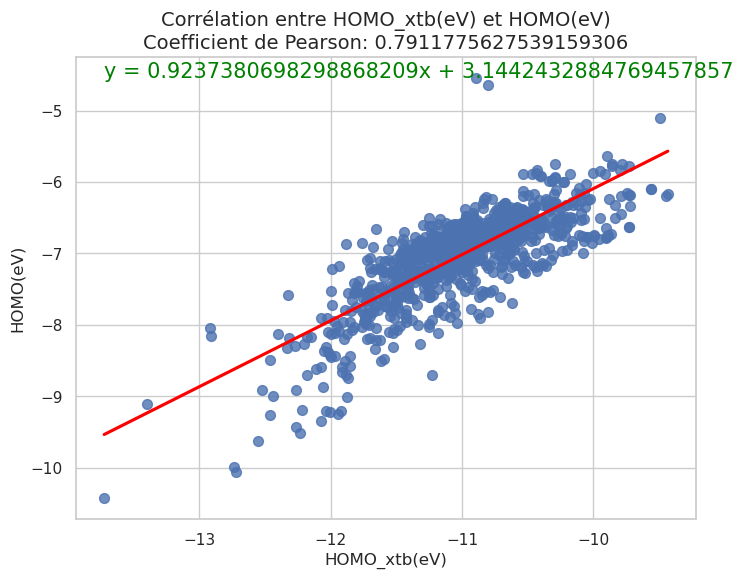

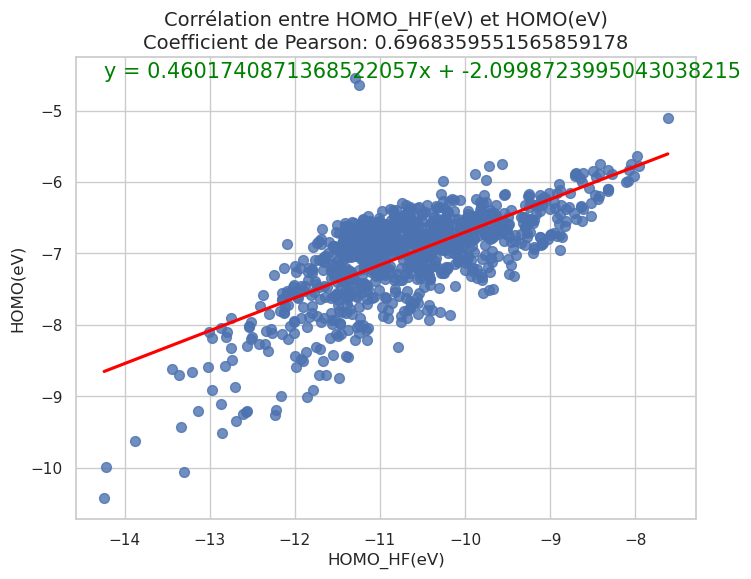

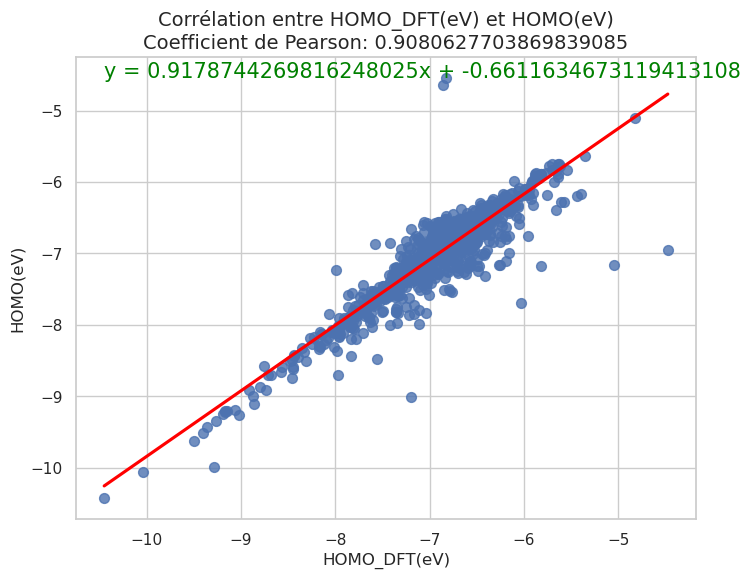

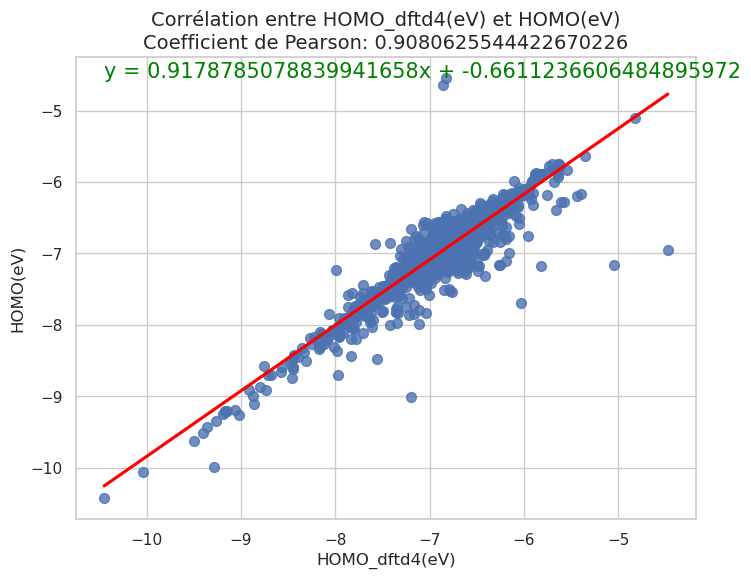

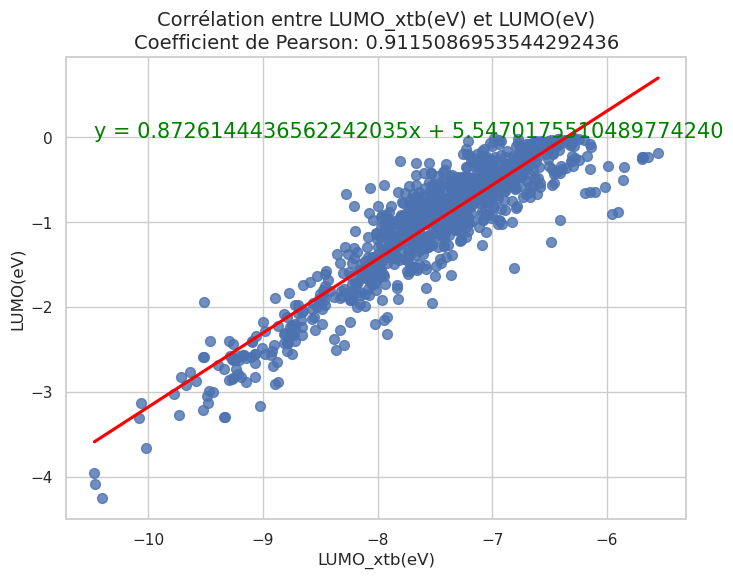

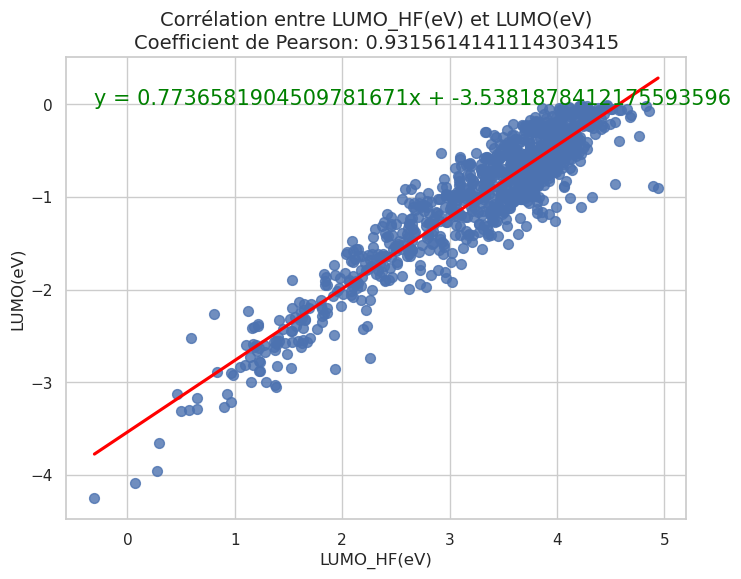

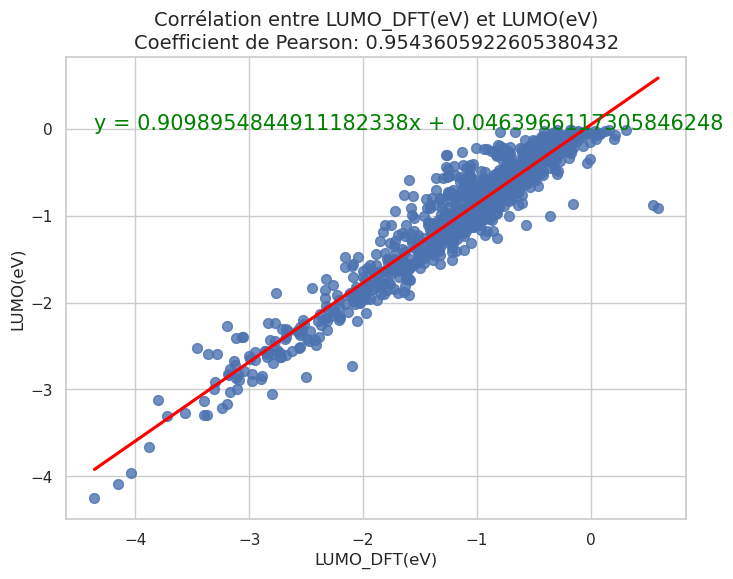

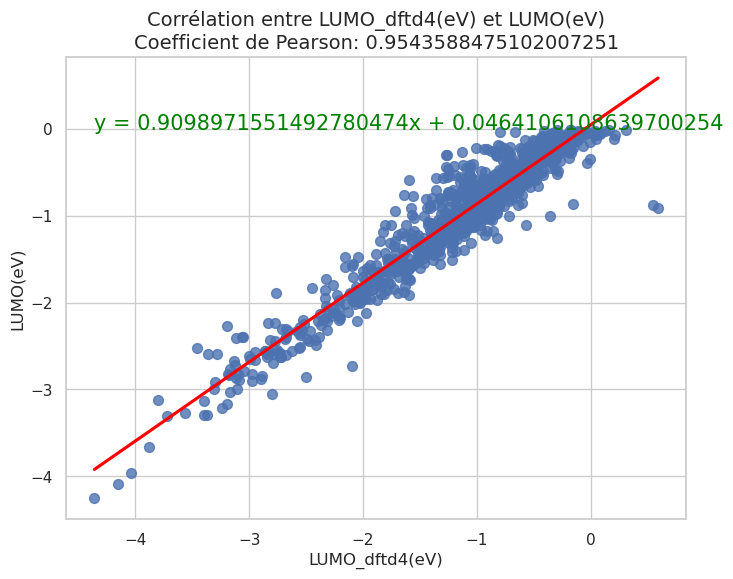

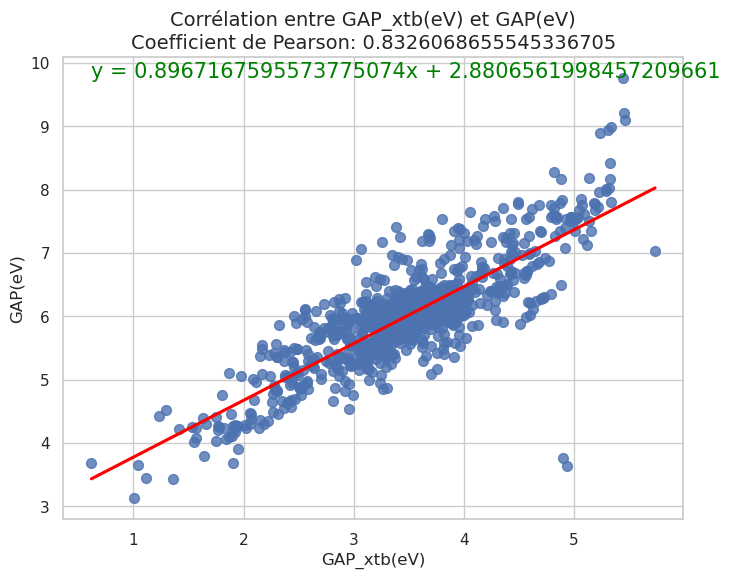

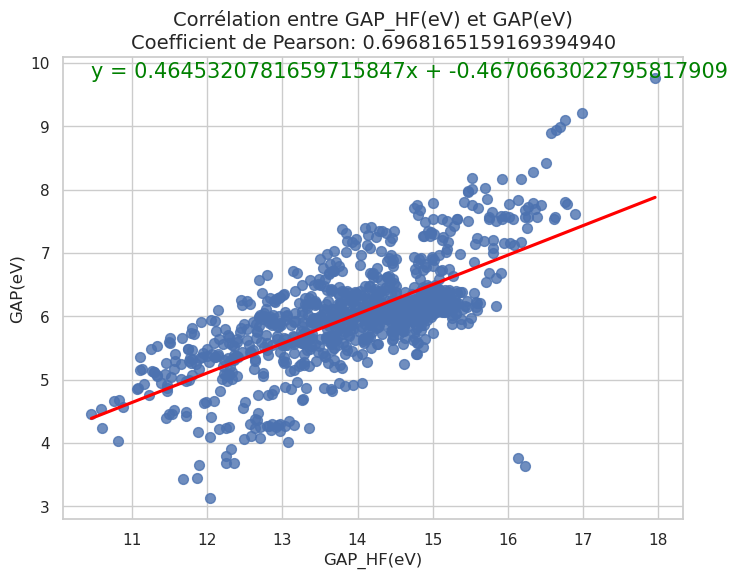

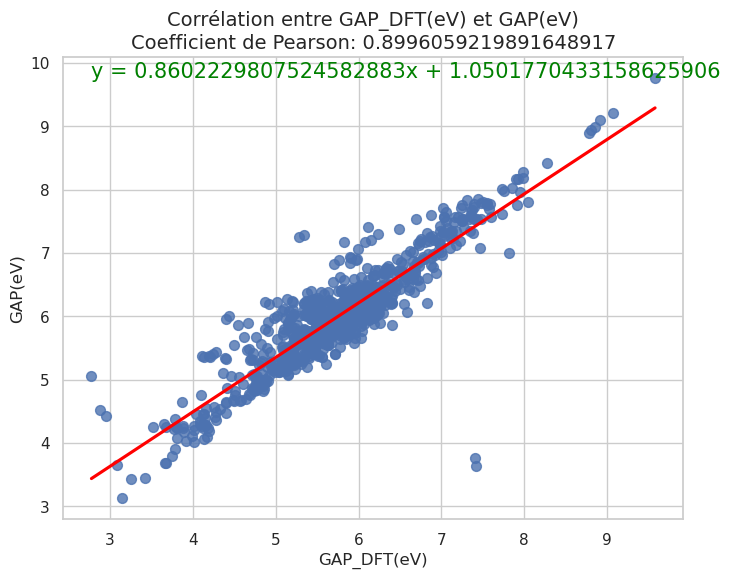

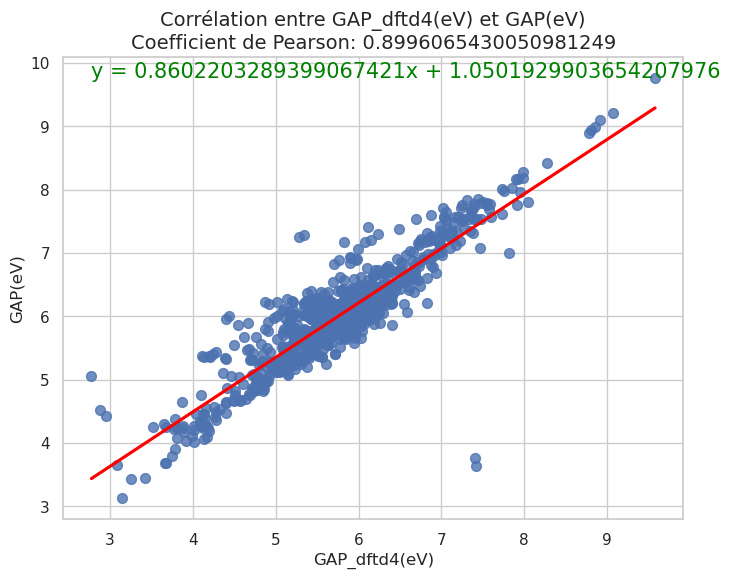

In [3]:
def calculate_and_plot_correlations(df):
    methods = ['xtb', 'HF', 'DFT', 'dftd4']
    properties = ['HOMO', 'LUMO','GAP']
    results = []

    # Boucle sur chaque paire de colonnes
    for prop in properties:
        for method in methods:
            # Noms des colonnes
            col1 = f'{prop}_{method}(eV)'
            col2 = f'{prop}(eV)'
            
            # Vérifier si les colonnes existent dans le DataFrame
            if col1 in df.columns and col2 in df.columns:
                list1 = df[col1]
                list2 = df[col2]
                
                # Calcul du coefficient de Pearson
                pearson_coef, p_value = pearsonr(list1, list2)
                
                # Régression linéaire
                slope, intercept, r_value, p_value, std_err = linregress(list1, list2)
                regress_values = list1 * slope + intercept
                line_eq = f'y = {slope:.19f}x + {intercept:.19f}'

                # Stocker les résultats
                results.append({
                    'Method': f'{prop}_{method}(eV)',
                    'Pearson Coefficient': pearson_coef,
                    'Slope': slope,
                    'Intercept': intercept,
                    'Line Equation': line_eq
                })
                
                # Tracer la corrélation avec Seaborn
                sns.set(style="whitegrid")
                plt.figure(figsize=(8, 6))
                sns.regplot(x=col1, y=col2, data=df, ci=None,
                            scatter_kws={'s': 50}, line_kws={'color': 'red'})
                
                # Ajout du coefficient de corrélation dans le titre
                plt.title(f'Corrélation entre {col1} et {col2}\nCoefficient de Pearson: {pearson_coef:.19f}', fontsize=14)
                plt.xlabel(col1, fontsize=12)
                plt.ylabel(col2, fontsize=12)
                
                # Affichage de l'équation de la régression linéaire sur le graphique
                plt.annotate(line_eq, (min(list1), max(list2)), fontsize=15, color="green")
                
                # Afficher le graphique
                plt.show()

    # Convertir les résultats en DataFrame
    results_df = pd.DataFrame(results)
    return results_df
results_df= calculate_and_plot_correlations(df)


In [4]:
results_df.to_csv('CALIBRAGE_VALUE_GDB9.csv', index=False)

In [5]:
results_df

Method  Pearson Coefficient     Slope  Intercept  \
0     HOMO_xtb(eV)             0.791178  0.923738   3.144243   
1      HOMO_HF(eV)             0.696836  0.460174  -2.099872   
2     HOMO_DFT(eV)             0.908063  0.917874  -0.661163   
3   HOMO_dftd4(eV)             0.908063  0.917879  -0.661124   
4     LUMO_xtb(eV)             0.911509  0.872614   5.547018   
5      LUMO_HF(eV)             0.931561  0.773658  -3.538188   
6     LUMO_DFT(eV)             0.954361  0.909895   0.046397   
7   LUMO_dftd4(eV)             0.954359  0.909897   0.046411   
8      GAP_xtb(eV)             0.832607  0.896717   2.880656   
9       GAP_HF(eV)             0.696817  0.464532  -0.467066   
10     GAP_DFT(eV)             0.899606  0.860223   1.050177   
11   GAP_dftd4(eV)             0.899607  0.860220   1.050193   

                                        Line Equation  
0   y = 0.9237380698298868209x + 3.144243288476945...  
1   y = 0.4601740871368522057x + -2.09987239950430...  
2   y = 0.9178744269816248025x + -0.66116346731194...  
3   y = 0.9178785078839941658x + -0.66112366064848...  
4   y = 0.8726144436562242035x + 5.547017551048977...  
5   y = 0.7736581904509781671x + -3.53818784121755...  
6   y = 0.9098954844911182338x + 0.046396611730584...  
7   y = 0.9098971551492780474x + 0.046410610863970...  
8   y = 0.8967167595573775074x + 2.880656199845720...  
9   y = 0.4645320781659715847x + -0.46706630227958...  
10  y = 0.8602229807524582883x + 1.050177043315862...  
11  y = 0.8602203289399067421x + 1.050192990365420...

In [6]:
results_df.to_latex()

'\\begin{tabular}{llrrrl}\n\\toprule\n & Method & Pearson Coefficient & Slope & Intercept & Line Equation \\\\\n\\midrule\n0 & HOMO_xtb(eV) & 0.791178 & 0.923738 & 3.144243 & y = 0.9237380698298868209x + 3.1442432884769457857 \\\\\n1 & HOMO_HF(eV) & 0.696836 & 0.460174 & -2.099872 & y = 0.4601740871368522057x + -2.0998723995043038215 \\\\\n2 & HOMO_DFT(eV) & 0.908063 & 0.917874 & -0.661163 & y = 0.9178744269816248025x + -0.6611634673119413108 \\\\\n3 & HOMO_dftd4(eV) & 0.908063 & 0.917879 & -0.661124 & y = 0.9178785078839941658x + -0.6611236606484895972 \\\\\n4 & LUMO_xtb(eV) & 0.911509 & 0.872614 & 5.547018 & y = 0.8726144436562242035x + 5.5470175510489774240 \\\\\n5 & LUMO_HF(eV) & 0.931561 & 0.773658 & -3.538188 & y = 0.7736581904509781671x + -3.5381878412175593596 \\\\\n6 & LUMO_DFT(eV) & 0.954361 & 0.909895 & 0.046397 & y = 0.9098954844911182338x + 0.0463966117305846248 \\\\\n7 & LUMO_dftd4(eV) & 0.954359 & 0.909897 & 0.046411 & y = 0.9098971551492780474x + 0.0464106108639700254 \

#  ALL CALIBRAGE GDB9 

In [7]:

def calibrate_data(df, results_df):
    # Création d'un DataFrame pour stocker les valeurs calibrées
    calibrated_df = pd.DataFrame()
    
    
    # Parcourir les lignes du DataFrame results_df
    for index, row in results_df.iterrows():
        method = row['Method']
        slope = row['Slope']
        intercept = row['Intercept']
        
        # Vérifier si la colonne existe dans le DataFrame
        if method in df.columns:
            for i in range(len(df)):
                # Extraire les données de la ligne actuelle
                prop_value = df.loc[i, method]
                prop_cal = prop_value * slope + intercept
                
                # Déterminer le nom de la colonne calibrée
                method_parts = method.split('_')
                prop = method_parts[0]
                method_name = method_parts[1].split('(')[0]
                calibrated_col = f'{prop}_{method_name}_calibrated'
                
                # Mettre à jour le DataFrame des valeurs calibrées
                #calibrated_df.loc[i,'SMILES'] = df.loc[i, 'SMILES']
                df.loc[i, calibrated_col] = prop_cal
            
            # Calculer et ajouter la Gap calibrée pour chaque méthode
            # if f'HOMO_{method_name}_calibrated' in calibrated_df.columns and f'LUMO_{method_name}_calibrated' in calibrated_df.columns:
            #     calibrated_df[f'GAP_{method_name}_calibrated'] = calibrated_df[f'LUMO_{method_name}_calibrated'] - calibrated_df[f'HOMO_{method_name}_calibrated']
    
    return df

# Appliquer la fonction sur le DataFrame
df1 = calibrate_data(df, results_df)
df1.to_csv('ALL_METHODE_CALIBRAGE_VALUE_GDB9.csv', index=False)
df1

smiles smiles_key  HOMO(eV)  HOMO_xtb(eV)  HOMO_HF(eV)  \
0              C=O      gdb 6 -7.265440      -11.5340   -11.850312   
1             CC=O     gdb 11 -6.911692      -11.1333   -11.408327   
2          CC(C)=O     gdb 18 -6.615088      -10.8478   -11.069303   
3           C#CC#C     gdb 23 -7.072239      -10.9034    -9.802031   
4           C#CC#N     gdb 24 -8.440972      -11.9700   -11.401705   
...            ...        ...       ...           ...          ...   
997   CCC(=O)C1CN1   gdb 2994 -6.955230      -10.3788   -10.394592   
998   CCC(=O)C1CO1   gdb 2995 -6.789241      -11.0452   -11.099934   
999   COC(=O)C1CO1   gdb 3003 -7.366122      -11.4742   -11.842167   
1000  OCC(=O)C1CC1   gdb 3005 -6.609646      -11.2266   -11.128445   
1001  OCC(=O)C1CN1   gdb 3006 -7.254556      -10.7620   -10.871473   

      HOMO_DFT(eV)  HOMO_dftd4(eV)  LUMO(eV)  LUMO_xtb(eV)  LUMO_HF(eV)  ...  \
0        -7.187662       -7.187658 -1.104782       -7.9133     3.992780  ...   
1        -6.842303       -6.842288 -0.538785       -7.2445     4.149730  ...   
2        -6.574520       -6.574504 -0.236739       -6.7433     4.302132  ...   
3        -7.086949       -7.086949 -0.582324       -6.0201     3.460663  ...   
4        -8.436782       -8.436791 -1.477578       -7.4442     2.649821  ...   
...            ...             ...       ...           ...          ...  ...   
997      -6.395235       -6.395265 -0.582324       -6.8988     4.045997  ...   
998      -6.679230       -6.679301 -0.680285       -7.2922     3.810473  ...   
999      -7.192911       -7.192938 -0.201364       -6.9236     4.107200  ...   
1000     -6.900238       -6.900265 -0.209528       -7.1982     3.836980  ...   
1001     -6.632447       -6.632471 -1.050360       -7.3675     3.586790  ...   

      HOMO_DFT_calibrated  HOMO_dftd4_calibrated  LUMO_xtb_calibrated  \
0               -7.258535              -7.258520            -1.358242   
1               -6.941538              -6.941513            -0.774638   
2               -6.695747              -6.695720            -0.337283   
3               -7.166093              -7.166082             0.293791   
4               -8.405070              -8.405073            -0.948899   
...                   ...                    ...                  ...   
997             -6.531187              -6.531200            -0.472975   
998             -6.791858              -6.791910            -0.816261   
999             -7.263352              -7.263367            -0.494616   
1000            -6.994716              -6.994729            -0.734236   
1001            -6.748917              -6.748926            -0.881969   

      LUMO_HF_calibrated  LUMO_DFT_calibrated  LUMO_dftd4_calibrated  \
0              -0.449141            -0.835404              -0.835391   
1              -0.327715            -0.507600              -0.507584   
2              -0.209809            -0.250810              -0.250794   
3              -0.860818            -0.524519              -0.524506   
4              -1.488132            -1.328364              -1.328402   
...                  ...                  ...                    ...   
997            -0.407969            -0.486542              -0.486578   
998            -0.590184            -0.736447              -0.736470   
999            -0.360619            -0.382906              -0.382874   
1000           -0.569677            -0.597864              -0.597891   
1001           -0.763238            -0.876468              -0.876467   

      GAP_xtb_calibrated  GAP_HF_calibrated  GAP_DFT_calibrated  \
0               6.127349           6.892558            6.399508   
1               6.367878           6.760150            6.412330   
2               6.561293           6.673458            6.424749   
3               7.259619           5.693880            6.606785   
4               6.939010           6.060318            7.007980   
...                  ...                ...                 ...   

# CALIBRAGE GDB 9 XTB-CREST

Pearsons correlation: 0.8326068655545337


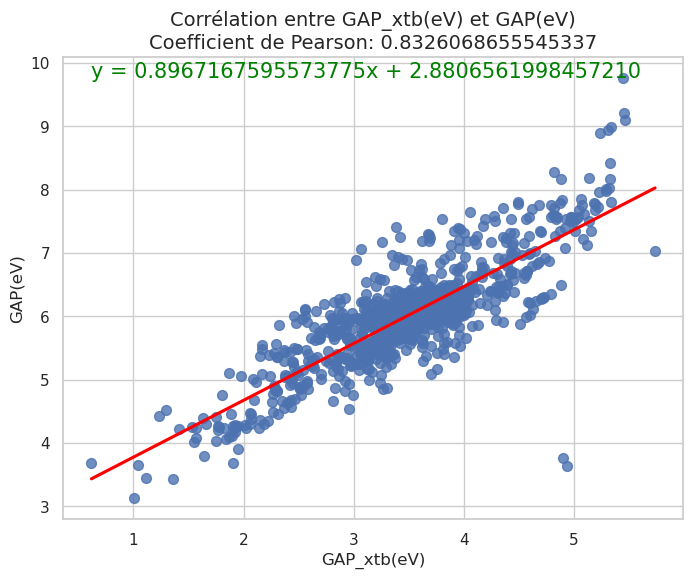

In [12]:
import seaborn as sns

# Convert dataframe into series
list1 = df1['GAP_xtb(eV)']

list2 = df1['GAP(eV)']

# Apply the pearsonr()
pearson_coef, p_value = pearsonr(list1, list2)
print('Pearsons correlation: %.16f' % pearson_coef)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(list1, list2)
regress_values = list1 * slope + intercept
line_eq = f'y = {slope:.16f}x + {intercept:.16f}'

# Tracer la corrélation avec Seaborn
sns.set(style="whitegrid")

# Création du graphique de corrélation
plt.figure(figsize=(8, 6))
sns.regplot(x='GAP_xtb(eV)', y='GAP(eV)', data=df1, ci=None,
            scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Ajout du coefficient de corrélation dans le titre
plt.title(f'Corrélation entre GAP_xtb(eV) et GAP(eV)\nCoefficient de Pearson: {pearson_coef:.16f}', fontsize=14)
plt.xlabel('GAP_xtb(eV)', fontsize=12)
plt.ylabel('GAP(eV)', fontsize=12)

# Affichage de l'équation de la régression linéaire sur le graphique
plt.annotate(line_eq, (min(list1), max(list2)), fontsize=15, color="green")

# Afficher le graphique
plt.show()

Pearsons correlation: 0.8326068655545336


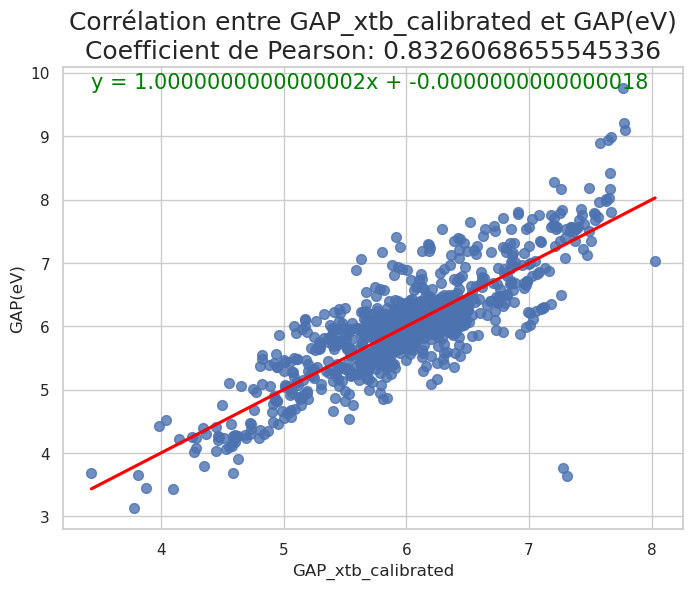

0.8326068655545336

In [18]:
import seaborn as sns

# Convert dataframe into series
list3 = df1['GAP_xtb_calibrated']

list4= df1['GAP(eV)']

# Apply the pearsonr()
pearson_coef, p_value = pearsonr(list3, list4)
print('Pearsons correlation: %.16f' % pearson_coef)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(list3, list4)
regress_values = 3 * slope + intercept
line_eq = f'y = {slope:.16f}x + {intercept:.16f}'

# Tracer la corrélation avec Seaborn
sns.set(style="whitegrid")

# Création du graphique de corrélation
plt.figure(figsize=(8, 6))
sns.regplot(x='GAP_xtb_calibrated', y='GAP(eV)', data=df1, ci=None,
            scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Ajout du coefficient de corrélation dans le titre
plt.title(f'Corrélation entre GAP_xtb_calibrated et GAP(eV)\nCoefficient de Pearson: {pearson_coef:.16f}', fontsize=18)
plt.xlabel('GAP_xtb_calibrated', fontsize=12)
plt.ylabel('GAP(eV)', fontsize=12)

# Affichage de l'équation de la régression linéaire sur le graphique
plt.annotate(line_eq, (min(list3), max(list4)), fontsize=15, color="green")

# Afficher le graphique
plt.show()


In [21]:
dfa=df1.iloc[0:60,:]
dfa

smiles smiles_key   HOMO(eV)  HOMO_xtb(eV)  HOMO_HF(eV)  \
0           C=O      gdb 6  -7.265440      -11.5340   -11.850312   
1          CC=O     gdb 11  -6.911692      -11.1333   -11.408327   
2       CC(C)=O     gdb 18  -6.615088      -10.8478   -11.069303   
3        C#CC#C     gdb 23  -7.072239      -10.9034    -9.802031   
4        C#CC#N     gdb 24  -8.440972      -11.9700   -11.401705   
5        N#CC#N     gdb 25 -10.057328      -12.7213   -13.304096   
6        O=CC#C     gdb 26  -7.556602      -11.4183   -11.386096   
7        O=CC#N     gdb 27  -8.615125      -12.1153   -13.445938   
8        O=CC=O     gdb 28  -7.259998      -11.5923   -11.985126   
9         CCC=O     gdb 35  -6.802847      -11.0118   -11.282662   
10        OCC=O     gdb 38  -6.903529      -11.6781   -11.784880   
11    CC(=O)C#C     gdb 56  -7.221902      -11.1283   -11.184677   
12    CC(=O)C#N     gdb 57  -8.182464      -11.7021   -12.970163   
13    NC(=O)C#C     gdb 59  -7.153873      -11.0746   -11.126607   
14    CC(=O)C=O     gdb 60  -6.906250      -11.1728   -11.535689   
15    NC(=O)C=O     gdb 62  -6.892644      -11.1150   -11.556433   
16     CC(C)C=O     gdb 68  -6.718491      -10.8975   -11.126399   
17     CC(O)C=O     gdb 69  -6.938903      -11.4502   -11.515657   
18     CC(=O)CO     gdb 71  -7.344353      -11.3742   -11.397544   
19     CCC(C)=O     gdb 72  -6.593319      -10.7360   -10.962885   
20     O=C1CCC1     gdb 90  -6.571550      -10.7414   -10.711170   
21     O=C1CNC1     gdb 93  -6.631415      -10.3588   -10.916818   
22     O=C1COC1     gdb 94  -7.202854      -11.4958   -11.395270   
23      N#CCC#N    gdb 109  -9.507658      -12.2362   -12.856945   
24      O=CCC#C    gdb 110  -7.028701      -11.1124   -10.682407   
25      O=CCC#N    gdb 111  -7.804226      -11.8488   -12.171930   
26      N=CNC=O    gdb 112  -6.778356      -11.0036   -10.582393   
27      N=COC=O    gdb 113  -7.983821      -11.2543   -11.466321   
28      O=CNC=O    gdb 114  -7.096729      -11.7249   -11.900110   
29      CC#CC#C    gdb 115  -6.585155      -10.4327    -9.273467   
30      CC#CC#N    gdb 116  -7.812389      -11.5391   -10.714767   
31      CC#CC=O    gdb 117  -7.189248      -11.0335   -10.681855   
32       CCCC=O    gdb 128  -6.767472      -10.9820   -11.009159   
33       COCC=O    gdb 131  -7.012374      -11.0261   -10.884202   
34       OCCC=O    gdb 132  -6.900807      -11.2435   -11.546908   
35     N#CC1CO1    gdb 144  -8.372943      -12.0228   -11.870590   
36     O=CC1CC1    gdb 145  -6.764751      -10.9398   -11.126836   
37     O=CC1CN1    gdb 146  -7.181085      -10.6985   -10.582737   
38     O=CC1CO1    gdb 147  -7.172921      -11.4271   -11.536893   
39     O=CN1CC1    gdb 148  -6.952509      -10.9353   -10.821808   
40    N1C=CN=N1    gdb 166  -7.186527      -10.4438    -9.734129   
41    N1N=CC=N1    gdb 169  -7.461362      -11.1205   -10.123328   
42    O1C=CC=N1    gdb 170  -7.284488      -11.2415    -9.816667   
43    O1C=CN=N1    gdb 171  -7.787899      -11.4234   -10.383690   
44    O1C=NC=N1    gdb 172  -8.310357      -11.5244   -10.790383   
45    O1C=NN=C1    gdb 173  -7.861369      -11.1345   -10.176417   
46    O1C=NN=N1    gdb 174  -9.006969      -11.8735   -11.860172   
47    O1N=CC=N1    gdb 175  -8.743018      -11.8679   -11.486944   
48    O1N=CN=N1    gdb 176  -9.194727      -12.2170   -12.223222   
49    O1N=NN=N1    gdb 177  -9.989300      -12.7385   -14.216714   
50   CC(=NO)C#C    gdb 178  -6.484473      -10.5114    -9.325512   
51    ON=C1COC1    gdb 183  -6.797404      -11.0037   -10.243990   
52  C1=CC=NC=C1    gdb 215  -6.851827      -10.0102    -9.346837   
53  C1=CN=CC=N1    gdb 216  -6.783799       -9.9023    -9.683460   
54  C1=CN=CN=C1    gdb 217  -6.887202      -10.1601   -10.231810   
55  C1=NC=NC=N1    gdb 218  -7.532112      -10.8439   -11.891383   
56  CC(C)(C)C=O    gdb 224  -6.721212      -10.7974   -11.028620   
57  CC(C)(O)C=O    gdb 225  -6.865433      -11.3479   -11.335826 

/tmp/ipykernel_14675/600929217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['diff_GAP'] = dfa['GAP(eV)'] - dfa['GAP_xtb(eV)']


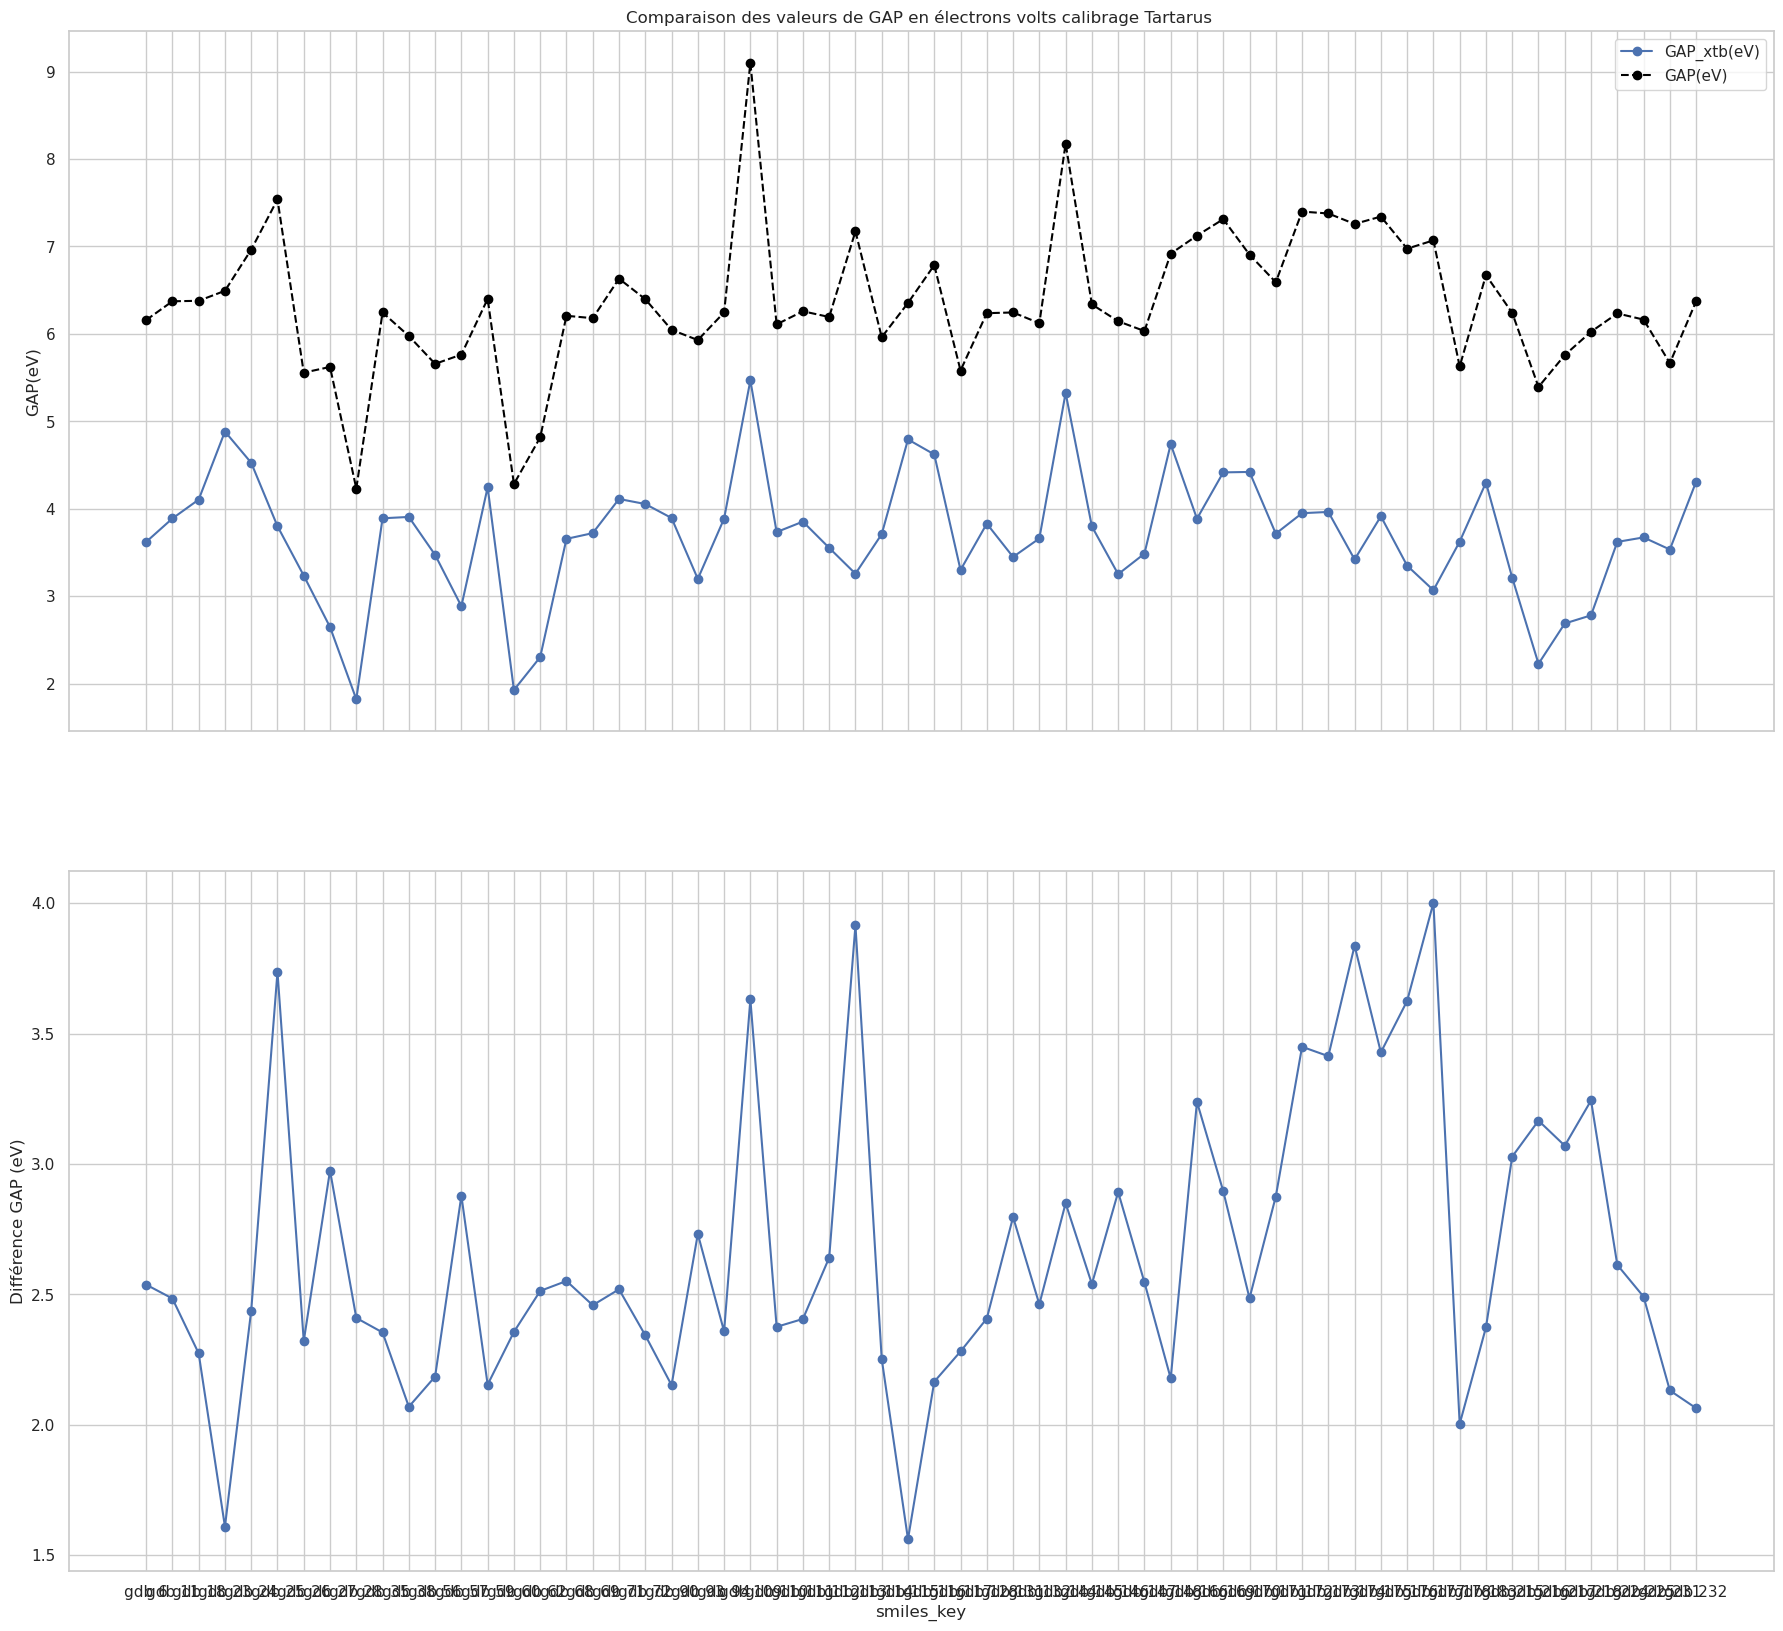

In [24]:
# Calculer la différence entre GAP non calibré et calibré pour chaque méthode
dfa['diff_GAP'] = dfa['GAP(eV)'] - dfa['GAP_xtb(eV)']
# df['diff_HOMO_HF'] = df['HOMO(eV)'] - df['HOMO_HF_calibrated']
# df['diff_HOMO_DFT'] = df['HOMO(eV)'] - df['HOMO_DFT_calibrated']
# df['diff_HOMO_dftd4'] = df['HOMO(eV)'] - df['HOMO_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(22, 20), sharex=True)


ax[0].plot(dfa['smiles_key'], dfa[f'GAP_xtb(eV)'], marker='o', label=f'GAP_xtb(eV)')
ax[0].plot(dfa['smiles_key'], dfa['GAP(eV)'], marker='o', label='GAP(eV)', linestyle='--', color='black')
ax[0].set_ylabel('GAP(eV)')
ax[0].set_title('Comparaison des valeurs de GAP en électrons volts calibrage Tartarus ')
ax[0].grid(True)
ax[0].legend()

/
# Différence GAP

ax[1].plot(dfa['smiles_key'], dfa['diff_GAP'], marker='o', label='diff_GAP')
ax[1].set_ylabel('Différence GAP (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_14675/899743769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['diff_GAP'] = dfa['GAP_xtb(eV)'] - dfa['GAP_xtb_calibrated']


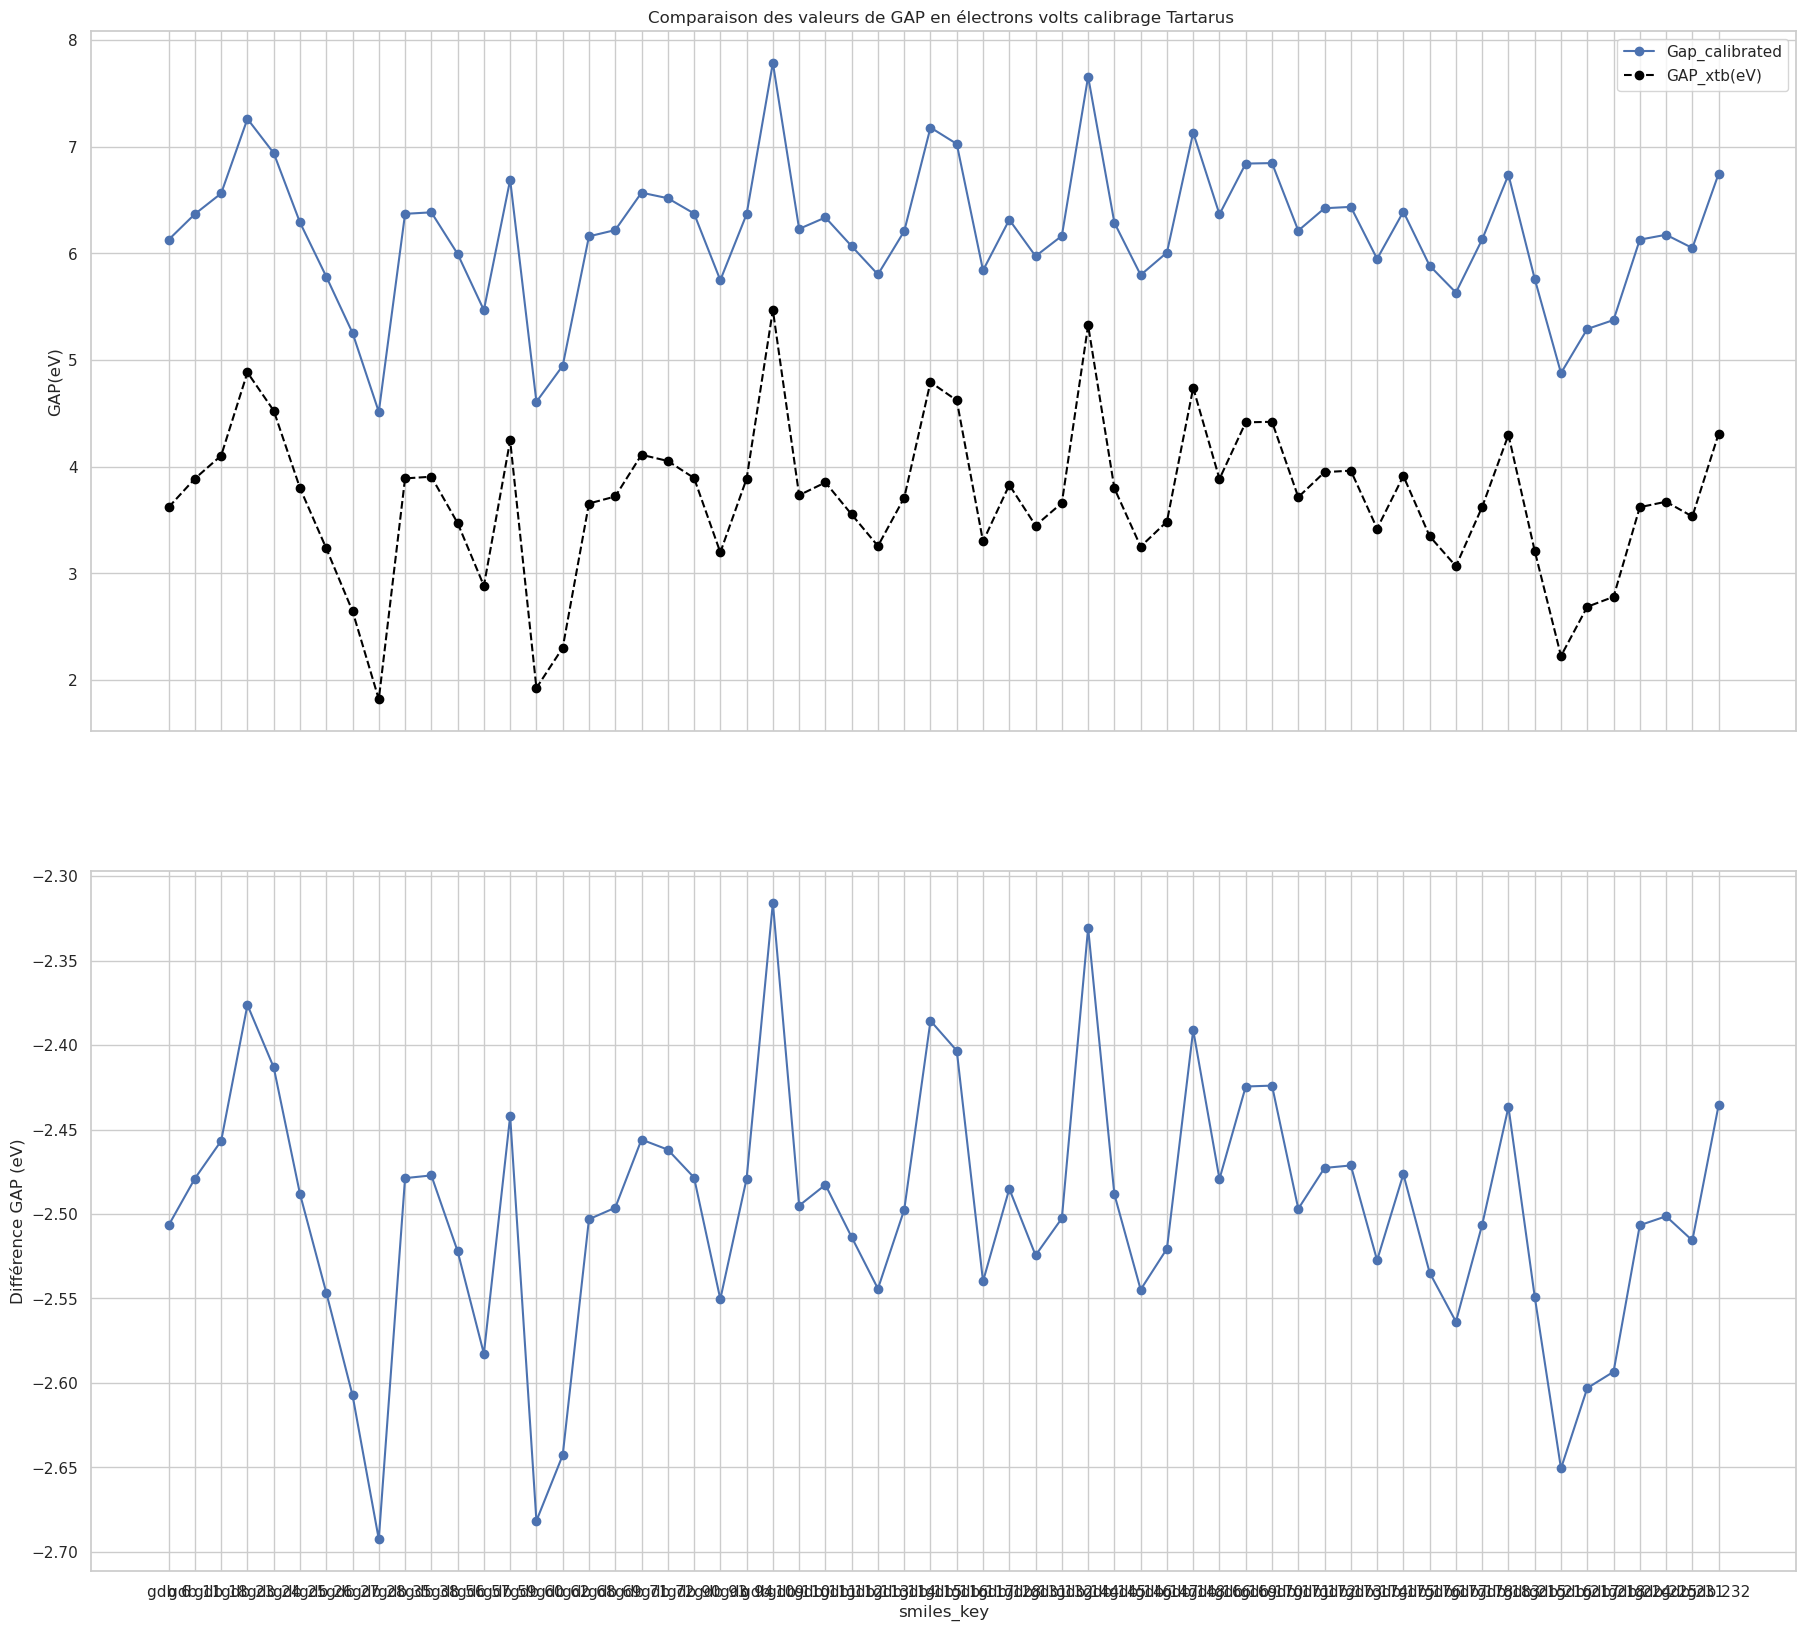

In [28]:
# Calculer la différence entre GAP non calibré et calibré pour chaque méthode
dfa['diff_GAP'] = dfa['GAP_xtb(eV)'] - dfa['GAP_xtb_calibrated']
# df['diff_HOMO_HF'] = df['HOMO(eV)'] - df['HOMO_HF_calibrated']
# df['diff_HOMO_DFT'] = df['HOMO(eV)'] - df['HOMO_DFT_calibrated']
# df['diff_HOMO_dftd4'] = df['HOMO(eV)'] - df['HOMO_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(22, 20), sharex=True)



# GAP Comparaison

ax[0].plot(dfa['smiles_key'], dfa['GAP_xtb_calibrated'], marker='o', label=f'Gap_calibrated')
ax[0].plot(dfa['smiles_key'], dfa['GAP_xtb(eV)'], marker='o', label='GAP_xtb(eV)', linestyle='--', color='black')
ax[0].set_ylabel('GAP(eV)')
ax[0].set_title('Comparaison des valeurs de GAP en électrons volts calibrage Tartarus ')
ax[0].grid(True)
ax[0].legend()
ax[1].plot(dfa['smiles_key'], dfa['diff_GAP'], marker='o', label='diff_GAP')
ax[1].set_ylabel('Différence GAP (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_14675/3367211592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['diff_GAP'] = dfa['GAP(eV)'] - dfa['GAP_xtb_calibrated']


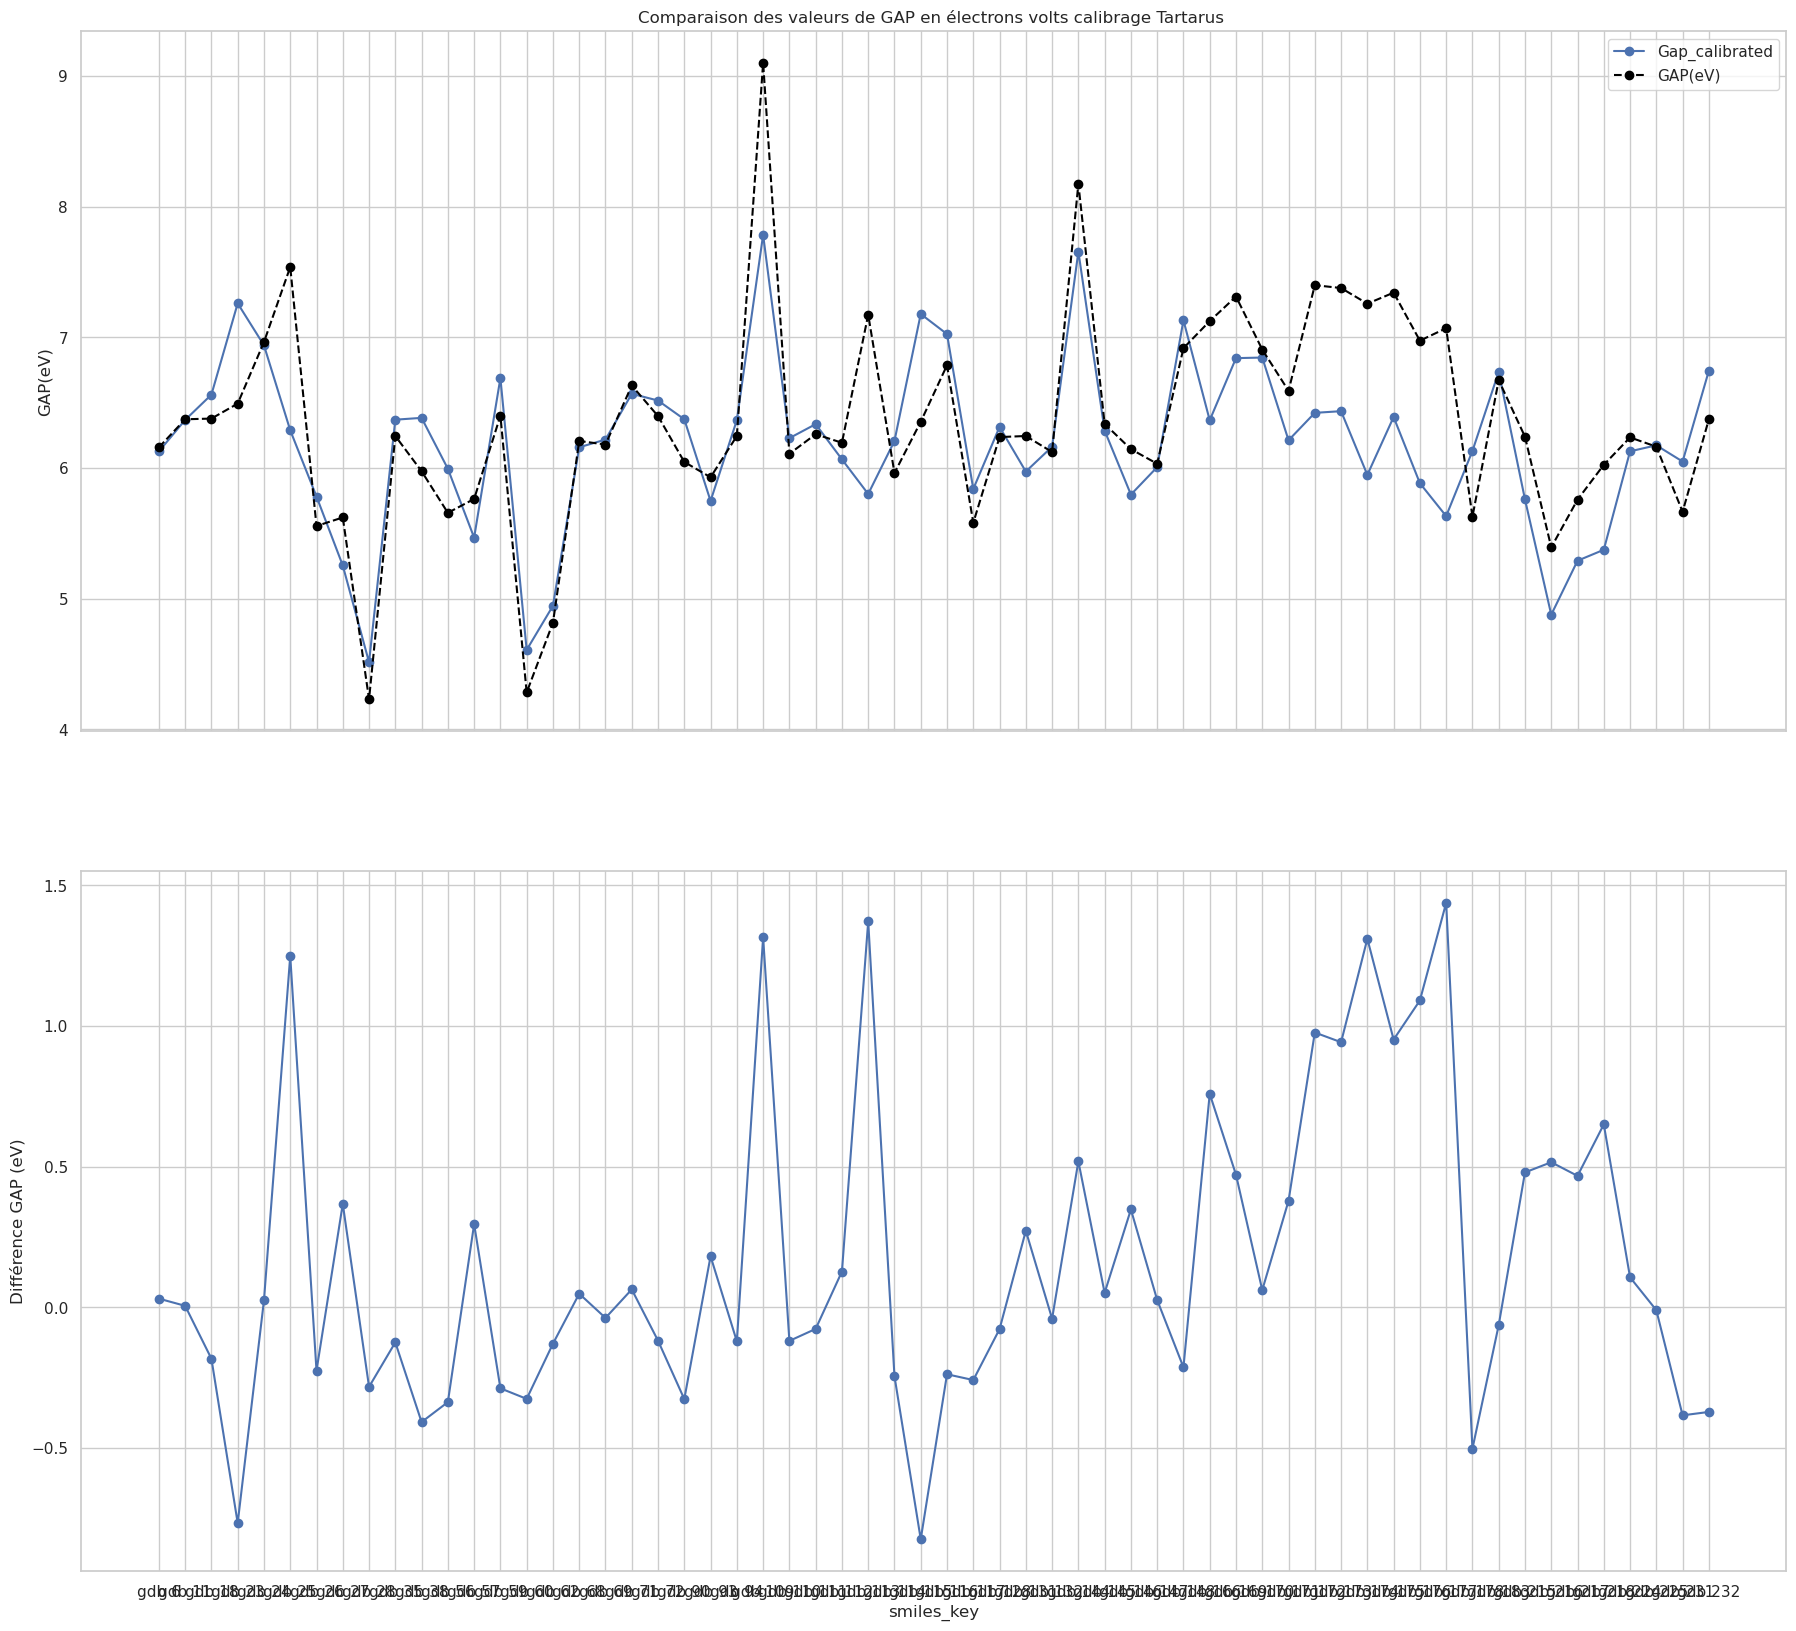

In [29]:
# Calculer la différence entre GAP non calibré et calibré pour chaque méthode
dfa['diff_HOMO'] = dfa['HOMO_xtb(eV)'] - dfa['HOMO_xtb_calibrated']
# df['diff_HOMO_HF'] = df['HOMO(eV)'] - df['HOMO_HF_calibrated']
# df['diff_HOMO_DFT'] = df['HOMO(eV)'] - df['HOMO_DFT_calibrated']
# df['diff_HOMO_dftd4'] = df['HOMO(eV)'] - df['HOMO_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(22, 20), sharex=True)



# GAP Comparaison

ax[0].plot(dfa['smiles_key'], dfa['HOMO_xtb_calibrated'], marker='o', label=f'HOMO_calibrated')
ax[0].plot(dfa['smiles_key'], dfa['HOMO_xtb(eV)'], marker='o', label='HOMO_xtb(eV)', linestyle='--', color='black')
ax[0].set_ylabel('GAP(eV)')
ax[0].set_title('Comparaison des valeurs de  en électrons volts calibrage Tartarus ')
ax[0].grid(True)
ax[0].legend()
ax[1].plot(dfa['smiles_key'], dfa['diff_GAP'], marker='o', label='diff_GAP')
ax[1].set_ylabel('Différence GAP (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_42097/851284732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_LUMO_xtb'] = df['LUMO(eV)'] - df['LUMO_xtb_calibrated']


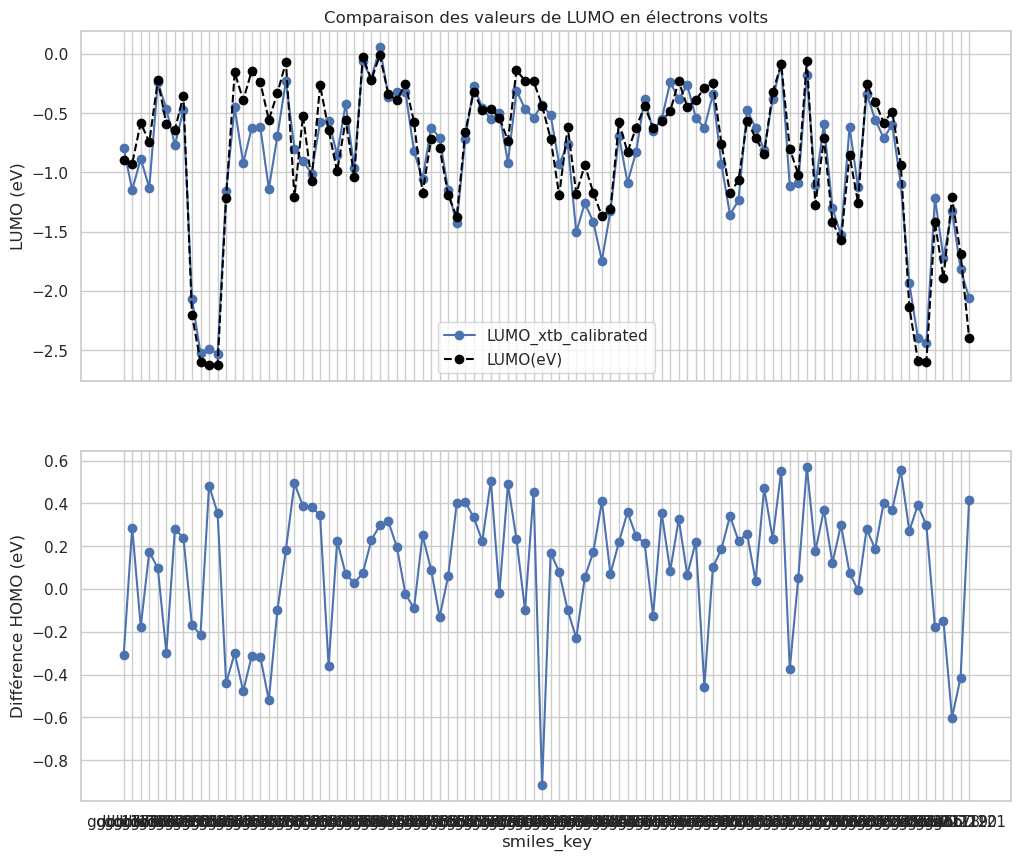

In [20]:
# # Calculer la différence entre GAP non calibré et calibré pour chaque méthode
df['diff_LUMO_xtb'] = df['LUMO(eV)'] - df['LUMO_xtb_calibrated']
#df['diff_LUMO_HF'] = df['LUMO(eV)'] - df['LUMO_HF_calibrated']
# df['diff_LUMO_DFT'] = df['LUMO(eV)'] - df['LUMO_DFT_calibrated']
# df['diff_LUMO_dftd4'] = df['LUMO(eV)'] - df['LUMO_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['xtb']
gap_cols = [f'LUMO_{method}_calibrated' for method in methods]
diff_cols = [f'diff_LUMO_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'LUMO_{method}_calibrated'], marker='o', label=f'LUMO_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['LUMO(eV)'], marker='o', label='LUMO(eV)', linestyle='--', color='black')
ax[0].set_ylabel('LUMO (eV)')
ax[0].set_title('Comparaison des valeurs de LUMO en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_HOMO_{method}'], marker='o', label=f'diff_HOMO_{method}')
ax[1].set_ylabel('Différence HOMO (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_42097/3927559287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_LUMO_HF'] = df['LUMO(eV)'] - df['LUMO_HF_calibrated']


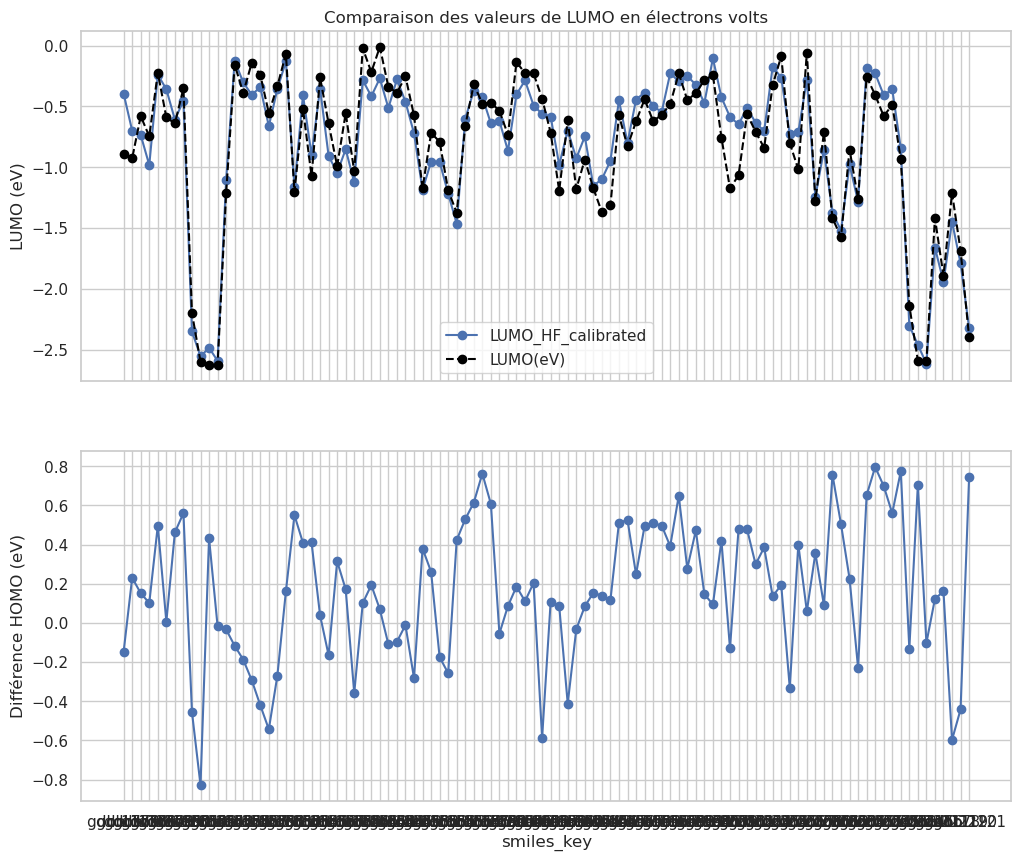

In [21]:
# # Calculer la différence entre GAP non calibré et calibré pour chaque méthode
# df['diff_LUMO_xtb'] = df['LUMO(eV)'] - df['LUMO_xtb_calibrated']
df['diff_LUMO_HF'] = df['LUMO(eV)'] - df['LUMO_HF_calibrated']
# df['diff_LUMO_DFT'] = df['LUMO(eV)'] - df['LUMO_DFT_calibrated']
# df['diff_LUMO_dftd4'] = df['LUMO(eV)'] - df['LUMO_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['HF']
gap_cols = [f'LUMO_{method}_calibrated' for method in methods]
diff_cols = [f'diff_LUMO_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'LUMO_{method}_calibrated'], marker='o', label=f'LUMO_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['LUMO(eV)'], marker='o', label='LUMO(eV)', linestyle='--', color='black')
ax[0].set_ylabel('LUMO (eV)')
ax[0].set_title('Comparaison des valeurs de LUMO en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_HOMO_{method}'], marker='o', label=f'diff_HOMO_{method}')
ax[1].set_ylabel('Différence HOMO (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_42097/2229351593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_LUMO_dftd4'] = df['LUMO(eV)'] - df['LUMO_dftd4_calibrated']


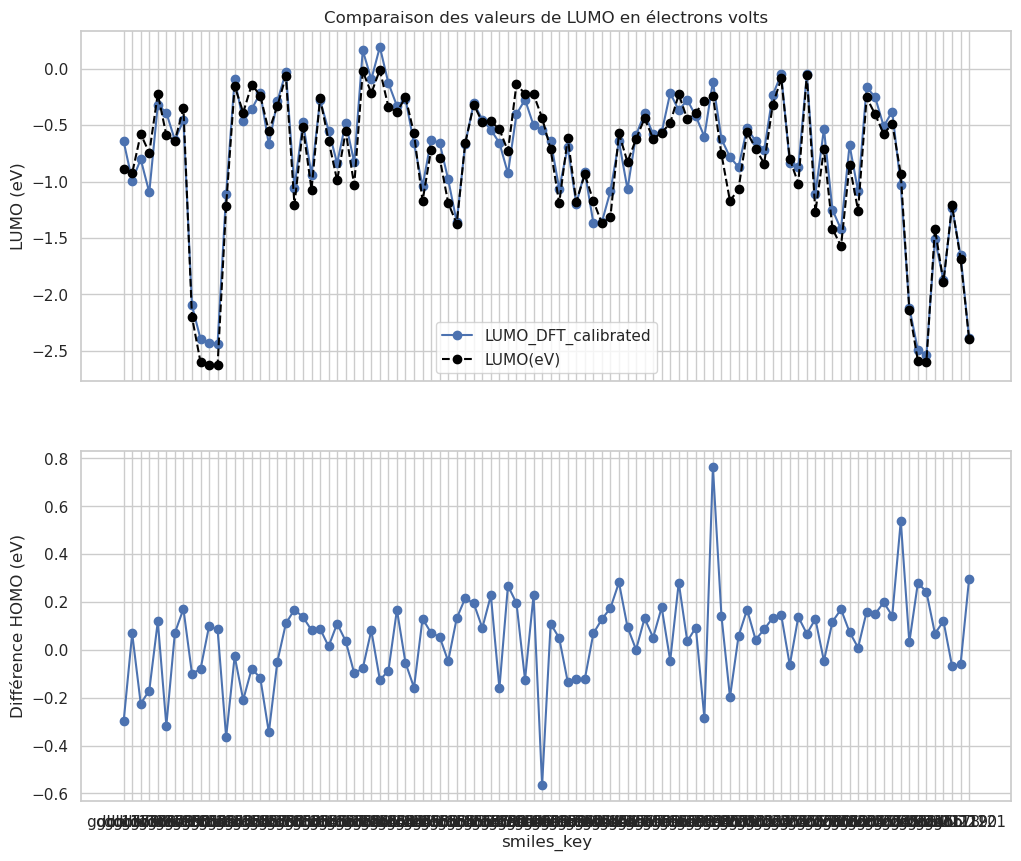

In [22]:
# Calculer la différence entre GAP non calibré et calibré pour chaque méthode

df['diff_LUMO_dftd4'] = df['LUMO(eV)'] - df['LUMO_dftd4_calibrated']
# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['DFT']
gap_cols = [f'LUMO_{method}_calibrated' for method in methods]
diff_cols = [f'diff_LUMO_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'LUMO_{method}_calibrated'], marker='o', label=f'LUMO_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['LUMO(eV)'], marker='o', label='LUMO(eV)', linestyle='--', color='black')
ax[0].set_ylabel('LUMO (eV)')
ax[0].set_title('Comparaison des valeurs de LUMO en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_HOMO_{method}'], marker='o', label=f'diff_HOMO_{method}')
ax[1].set_ylabel('Différence HOMO (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_42097/2996590658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_LUMO_HF'] = df['LUMO(eV)'] - df['LUMO_HF_calibrated']


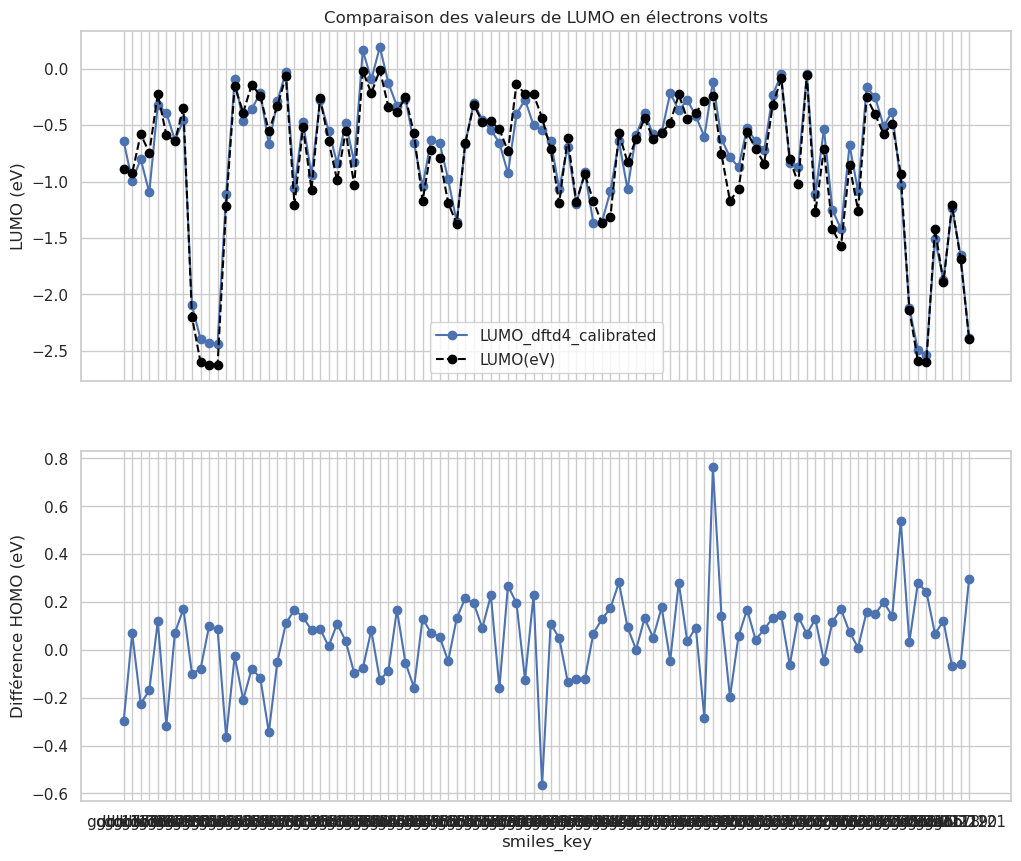

In [23]:
# Calculer la différence entre GAP non calibré et calibré pour chaque méthode

df['diff_LUMO_HF'] = df['LUMO(eV)'] - df['LUMO_HF_calibrated']


# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['dftd4']
gap_cols = [f'LUMO_{method}_calibrated' for method in methods]
diff_cols = [f'diff_LUMO_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'LUMO_{method}_calibrated'], marker='o', label=f'LUMO_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['LUMO(eV)'], marker='o', label='LUMO(eV)', linestyle='--', color='black')
ax[0].set_ylabel('LUMO (eV)')
ax[0].set_title('Comparaison des valeurs de LUMO en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_HOMO_{method}'], marker='o', label=f'diff_HOMO_{method}')
ax[1].set_ylabel('Différence HOMO (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_42097/3999284610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_GAP_dftd4'] = df['GAP(eV)'] - df['GAP_dftd4_calibrated']


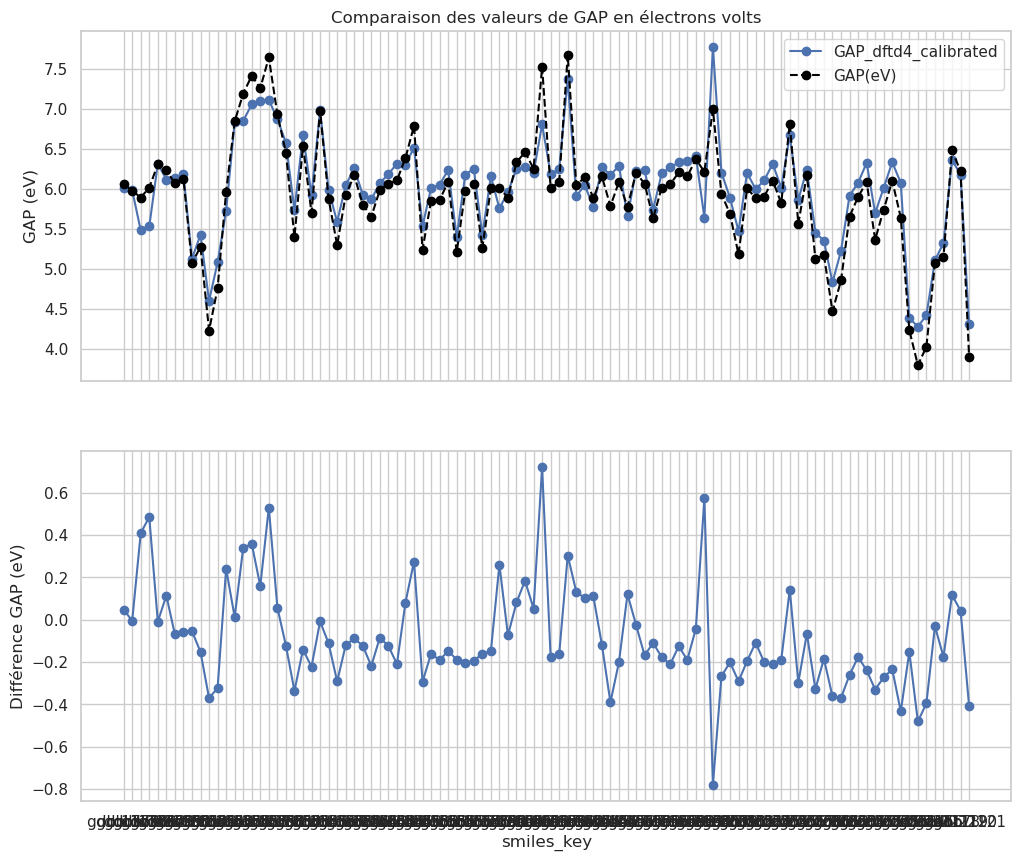

In [24]:
# # Calculer la différence entre GAP non calibré et calibré pour chaque méthode
# df['diff_GAP_xtb'] = df['GAP(eV)'] - df['GAP_xtb_calibrated']
# df['diff_GAP_HF'] = df['GAP(eV)'] - df['GAP_HF_calibrated']
# df['diff_GAP_DFT'] = df['GAP(eV)'] - df['GAP_DFT_calibrated']
df['diff_GAP_dftd4'] = df['GAP(eV)'] - df['GAP_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['dftd4']
gap_cols = [f'GAP_{method}_calibrated' for method in methods]
diff_cols = [f'diff_GAP_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'GAP_{method}_calibrated'], marker='o', label=f'GAP_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['GAP(eV)'], marker='o', label='GAP(eV)', linestyle='--', color='black')
ax[0].set_ylabel('GAP (eV)')
ax[0].set_title('Comparaison des valeurs de GAP en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_GAP_{method}'], marker='o', label=f'diff_GAP_{method}')
ax[1].set_ylabel('Différence GAP (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_42097/1307361768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_GAP_xtb'] = df['GAP(eV)'] - df['GAP_xtb_calibrated']


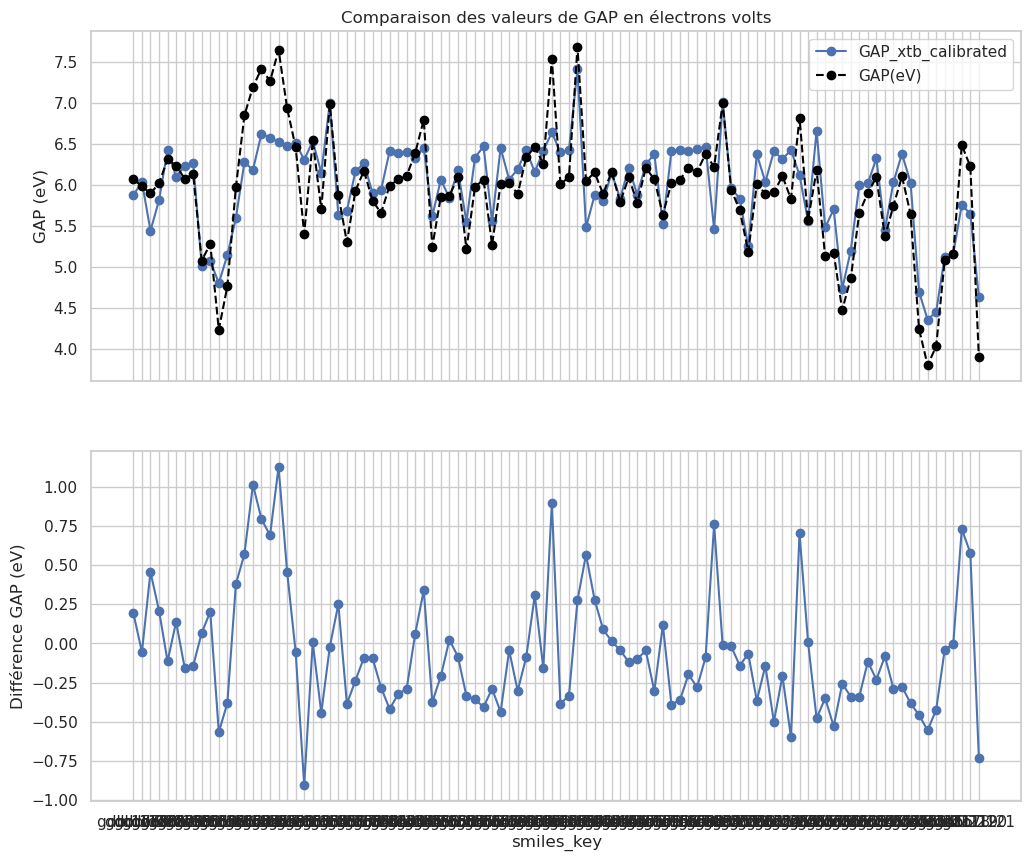

In [25]:
# # Calculer la différence entre GAP non calibré et calibré pour chaque méthode
df['diff_GAP_xtb'] = df['GAP(eV)'] - df['GAP_xtb_calibrated']
# df['diff_GAP_HF'] = df['GAP(eV)'] - df['GAP_HF_calibrated']
# df['diff_GAP_DFT'] = df['GAP(eV)'] - df['GAP_DFT_calibrated']
# df['diff_GAP_dftd4'] = df['GAP(eV)'] - df['GAP_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['xtb']
gap_cols = [f'GAP_{method}_calibrated' for method in methods]
diff_cols = [f'diff_GAP_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'GAP_{method}_calibrated'], marker='o', label=f'GAP_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['GAP(eV)'], marker='o', label='GAP(eV)', linestyle='--', color='black')
ax[0].set_ylabel('GAP (eV)')
ax[0].set_title('Comparaison des valeurs de GAP en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_GAP_{method}'], marker='o', label=f'diff_GAP_{method}')
ax[1].set_ylabel('Différence GAP (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_42097/3975588910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_GAP_HF'] = df['GAP(eV)'] - df['GAP_HF_calibrated']


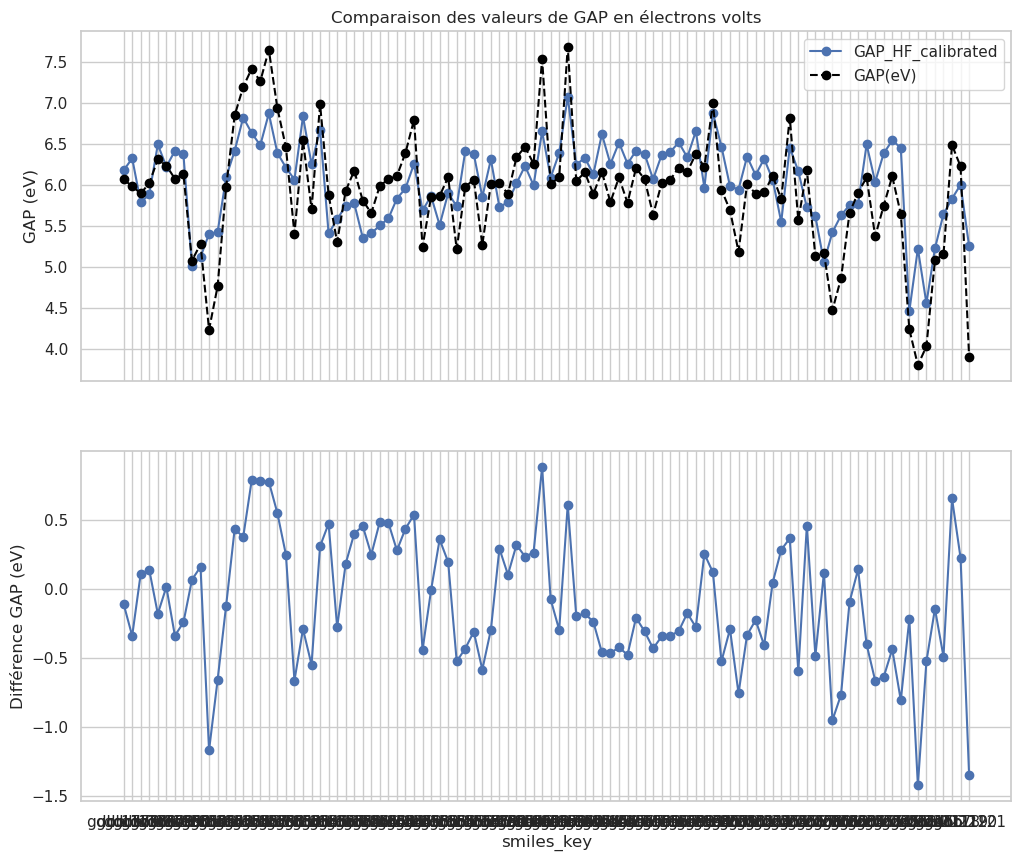

In [26]:
# # Calculer la différence entre GAP non calibré et calibré pour chaque méthode
# df['diff_GAP_xtb'] = df['GAP(eV)'] - df['GAP_xtb_calibrated']
df['diff_GAP_HF'] = df['GAP(eV)'] - df['GAP_HF_calibrated']
# df['diff_GAP_DFT'] = df['GAP(eV)'] - df['GAP_DFT_calibrated']
# df['diff_GAP_dftd4'] = df['GAP(eV)'] - df['GAP_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['HF']
gap_cols = [f'GAP_{method}_calibrated' for method in methods]
diff_cols = [f'diff_GAP_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'GAP_{method}_calibrated'], marker='o', label=f'GAP_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['GAP(eV)'], marker='o', label='GAP(eV)', linestyle='--', color='black')
ax[0].set_ylabel('GAP (eV)')
ax[0].set_title('Comparaison des valeurs de GAP en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_GAP_{method}'], marker='o', label=f'diff_GAP_{method}')
ax[1].set_ylabel('Différence GAP (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_42097/1614700928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_GAP_DFT'] = df['GAP(eV)'] - df['GAP_DFT_calibrated']


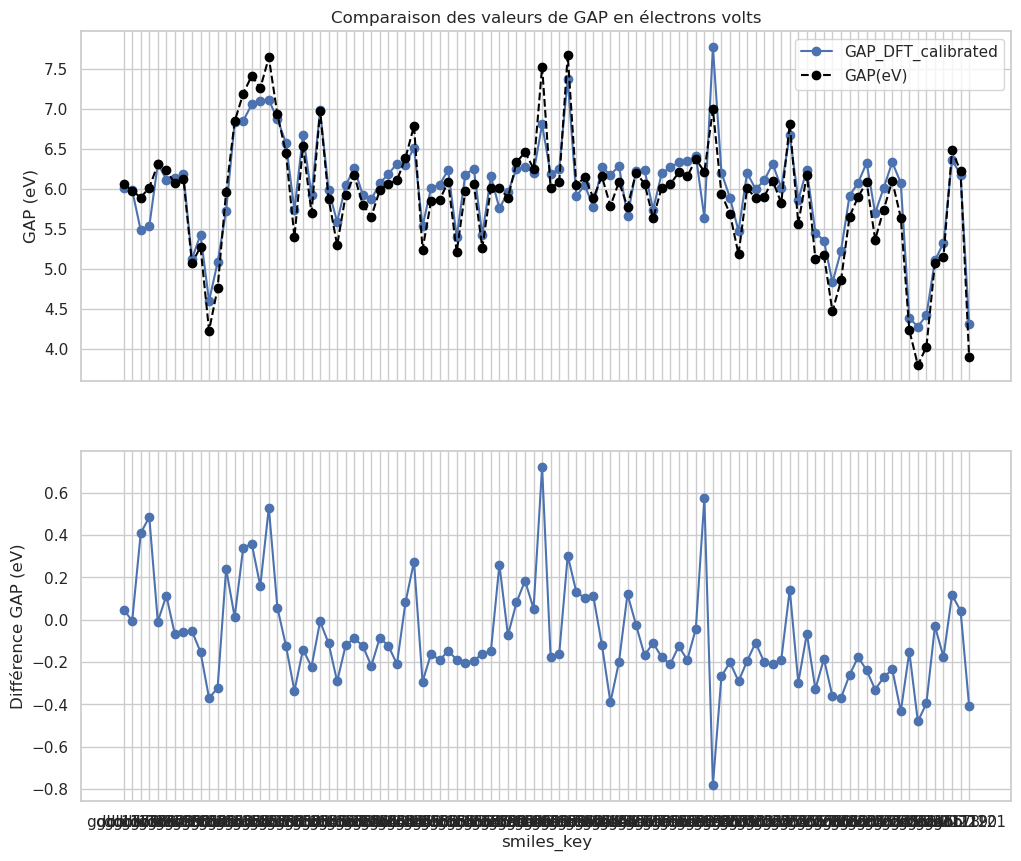

In [27]:
# # # Calculer la différence entre GAP non calibré et calibré pour chaque méthode
# df['diff_GAP_xtb'] = df['GAP(eV)'] - df['GAP_xtb_calibrated']
# df['diff_GAP_HF'] = df['GAP(eV)'] - df['GAP_HF_calibrated']
df['diff_GAP_DFT'] = df['GAP(eV)'] - df['GAP_DFT_calibrated']
# df['diff_GAP_dftd4'] = df['GAP(eV)'] - df['GAP_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['DFT']
gap_cols = [f'GAP_{method}_calibrated' for method in methods]
diff_cols = [f'diff_GAP_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'GAP_{method}_calibrated'], marker='o', label=f'GAP_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['GAP(eV)'], marker='o', label='GAP(eV)', linestyle='--', color='black')
ax[0].set_ylabel('GAP (eV)')
ax[0].set_title('Comparaison des valeurs de GAP en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_GAP_{method}'], marker='o', label=f'diff_GAP_{method}')
ax[1].set_ylabel('Différence GAP (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

L'utilisation d'un solvant approprié dans des calculs de chimie quantique pour des bases de données de grandes molécules organiques dépend de plusieurs facteurs, dont la nature des molécules étudiées, les propriétés que vous souhaitez modéliser, et la précision requise. Voici quelques conseils pour choisir un solvant :

1. Contexte du Système
Nature des molécules : Si vos molécules organiques sont principalement apolaires ou non polaires, un solvant apolaire comme l'hexane ou le toluène pourrait être approprié.
Interactions spécifiques : Si vos molécules présentent des fonctionnalités polaires ou des groupes fonctionnels capables de former des liaisons hydrogène, un solvant polaire comme l'eau ou le méthanol pourrait être plus adapté.
2. Types de Solvants
Solvants Apolaires : Toluène, hexane, cyclohexane.
Solvants Polaires Aprotiques : Acétonitrile, dichlorométhane, tétrahydrofurane (THF), diméthylsulfoxyde (DMSO).
Solvants Polaires Protiques : Eau, méthanol, éthanol.
3. Recommandations Générales
Solvant Universel : Si vous travaillez avec une base de données diverse de molécules organiques, un solvant relativement apolaire comme toluène ou dichlorométhane peut être un bon compromis car ils sont souvent utilisés dans les synthèses organiques.
Solvant Polaire : Si vous prévoyez de modéliser des interactions polaires significatives, l'eau ou méthanol peuvent être plus appropriés.
4. Utilisation de GBSA
Le modèle GBSA (Generalized Born Surface Area) est un modèle de solvant implicite qui peut être utilisé dans les calculs de chimie quantique pour estimer l'effet du solvant sans inclure explicitement les molécules de solvant. C'est une méthode efficace pour réduire le coût computationnel tout en tenant compte des effets de solvant.


Modèles de Solvatation Continue
Les modèles de solvatation continue, comme GBSA, simplifient les calculs en évitant la nécessité de simuler un grand nombre de molécules de solvant individuellement, ce qui réduit considérablement le coût computationnel. Voici quelques caractéristiques clés :

Approximation du Solvant : Le solvant est représenté comme un champ continu plutôt que par des molécules discrètes.
Born Equation : La partie "Generalized Born" (GB) du modèle est basée sur l'équation de Born, qui décrit l'énergie de solvatation des ions sphériques dans un solvant continu.
Surface Area : La partie "Surface Area" (SA) est utilisée pour estimer les contributions non polaires à l'énergie de solvatation, souvent en fonction de la surface accessible aux solvants (SASA).
Comment Fonctionne GBSA
Calcul de l'Énergie de Solvatation Polaire : Utilise l'équation de Born généralisée pour approximer l'énergie de solvatation électrostatique en fonction de la distribution de charge de la molécule et de la constante diélectrique du solvant.
Calcul de l'Énergie de Solvatation Non Polaire : Estime l'énergie de solvatation non polaire basée sur la surface accessible au solvant, souvent modélisée comme une fonction linéaire de la surface exposta.
Avantages et Inconvénients
Avantages :

Efficacité Computationnelle : Réduit le coût de calcul par rapport aux modèles de solvatation explicite.
Simplicité : Facile à implémenter dans les logiciels de chimie computationnelle.
Robustesse : Fournit des résultats raisonnablement précis pour une large gamme de systèmes chimiques.
Inconvénients :

Approximation : Peut manquer de précision pour des systèmes où les interactions spécifiques soluté-solvant sont cruciales.
Limites : Les effets microscopiques du solvant, comme les interactions hydrogène spécifiques, ne sont pas explicitement modélisés.